### **`Business Understanding`**

**Objective**: Predict changes in the price index based on historical prices of Bitcoin, oil, and gold, along with other related features (e.g., DXY index).

**Key Questions:**
1. How are Bitcoin, oil, and gold prices related to changes in the price index?
2. Can external features like holidays, weekdays, or DXY influence the model's predictions?
3. What insights can the model provide for portfolio management or market forecasting?

### **`Data Understanding`**

### **Importattion of Packages**

In [265]:
# Descriptive Analytics Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis Packages
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#Utilities & Model Persistance
import warnings
import joblib

sns.set_style('darkgrid')
warnings.filterwarnings("ignore",)

In [266]:
df = pd.read_csv('../datasets/final_dataset.csv')
df

,Unnamed: 0,Date,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_close,...,gold_open,gold_high,gold_low,dxy_close,dxy_open,dxy_high,dxy_low,IS_HOLIDAY,IS_WEEKDAY,Title
0,3652,2024-10-31,Thursday,10,2024,NaN,NaN,NaN,NaN,69.26,...,"2,799.10","2,801.20","2,741.80",103.98,104.08,104.22,103.82,0.0,1,NaN
1,3651,2024-10-30,Wednesday,10,2024,NaN,NaN,NaN,NaN,68.61,...,"2,786.90","2,801.80","2,782.40",103.99,104.25,104.44,103.98,0.0,1,NaN
2,3650,2024-10-29,Tuesday,10,2024,NaN,NaN,NaN,NaN,67.21,...,"2,741.90","2,773.20","2,741.90",104.32,104.31,104.64,104.21,0.0,1,NaN
3,3649,2024-10-28,Monday,10,2024,NaN,NaN,NaN,NaN,67.38,...,"2,749.20","2,758.30","2,736.90",104.32,104.32,104.57,104.12,0.0,1,NaN
4,3648,2024-10-27,Sunday,10,2024,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,4,2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,78.68,...,"1,168.40","1,169.30","1,137.10",87.44,87.01,87.61,86.94,0.0,1,NaN
3649,3,2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,77.19,...,"1,164.60","1,175.00","1,163.40",86.98,87.25,87.30,86.88,0.0,1,NaN
3650,2,2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,78.78,...,"1,171.10","1,173.40","1,161.00",87.31,87.08,87.41,87.02,0.0,1,NaN
3651,1,2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN


### **Exploratory Data Analysis**

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3653 non-null   int64  
 1   Date        3653 non-null   object 
 2   DoW         3653 non-null   object 
 3   Month       3653 non-null   int64  
 4   Year        3653 non-null   int64  
 5   btc_open    3643 non-null   float64
 6   btc_high    3643 non-null   float64
 7   btc_low     3643 non-null   float64
 8   btc_close   3643 non-null   float64
 9   oil_close   2637 non-null   float64
 10  oil_open    2637 non-null   float64
 11  oil_high    2637 non-null   float64
 12  oil_low     2637 non-null   float64
 13  gold_close  2564 non-null   object 
 14  gold_open   2564 non-null   object 
 15  gold_high   2564 non-null   object 
 16  gold_low    2564 non-null   object 
 17  dxy_close   2610 non-null   float64
 18  dxy_open    2610 non-null   float64
 19  dxy_high    2610 non-null  

In [268]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3653.0,1826.000000,1054.674594,0.00,913.0000,1826.000,2739.0000,3652.00
Month,3653.0,6.522310,3.449345,1.00,4.0000,7.000,10.0000,12.00
Year,3653.0,2019.333425,2.897193,2014.00,2017.0000,2019.000,2022.0000,2024.00
btc_open,3643.0,18449.732976,20039.914540,176.90,1319.8550,9314.130,29848.5850,73079.38
btc_high,3643.0,18865.656794,20480.738577,211.73,1339.5950,9466.350,30391.1100,73750.07
btc_low,3643.0,18008.726780,19563.811246,171.51,1315.0650,9149.390,29307.6250,71334.09
btc_close,3643.0,18467.017137,20052.330675,178.10,1334.8400,9316.630,29859.7400,73083.50
oil_close,2637.0,61.870300,17.522667,11.57,48.7000,59.640,74.1300,119.78
oil_open,2637.0,61.894638,17.514253,18.01,48.7900,59.650,74.1800,120.66
oil_high,2637.0,62.903367,17.769240,19.66,49.4600,60.500,75.3100,126.42


#### **Data Cleaning**

In [269]:
df.drop(columns='Unnamed: 0', inplace=True)

In [270]:
df.isna().sum()

Date             0
DoW              0
Month            0
Year             0
btc_open        10
btc_high        10
btc_low         10
btc_close       10
oil_close     1016
oil_open      1016
oil_high      1016
oil_low       1016
gold_close    1089
gold_open     1089
gold_high     1089
gold_low      1089
dxy_close     1043
dxy_open      1043
dxy_high      1043
dxy_low       1043
IS_HOLIDAY       0
IS_WEEKDAY       0
Title         3549
dtype: int64

In [271]:
df['Date'] = pd.to_datetime(df['Date'])

In [272]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-11-01 00:00:00'), Timestamp('2024-10-31 00:00:00'))

In [273]:
numeric_columns = ['gold_open', 'gold_high', 'gold_low', 'gold_close'] 
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')


##### **Rearranging columns for easier analysis**

In [274]:
df.columns

Index(['Date', 'DoW', 'Month', 'Year', 'btc_open', 'btc_high', 'btc_low',
       'btc_close', 'oil_close', 'oil_open', 'oil_high', 'oil_low',
       'gold_close', 'gold_open', 'gold_high', 'gold_low', 'dxy_close',
       'dxy_open', 'dxy_high', 'dxy_low', 'IS_HOLIDAY', 'IS_WEEKDAY', 'Title'],
      dtype='object')

In [275]:
new_column_order = ['Date', 'DoW', 'Month', 'Year', 
                    'btc_open', 'btc_high', 'btc_low','btc_close',
                    'oil_open', 'oil_high', 'oil_low', 'oil_close', 
                    'gold_open', 'gold_high', 'gold_low', 'gold_close',
                    'dxy_open', 'dxy_high', 'dxy_low', 'dxy_close', 
                    'IS_HOLIDAY', 'IS_WEEKDAY', 'Title']

df = df[new_column_order]

In [276]:
df.rename(columns={'Title': 'Holiday_Name'}, inplace=True)

In [277]:
df

,Date,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,...,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
0,2024-10-31,Thursday,10,2024,NaN,NaN,NaN,NaN,69.10,70.81,...,2801.2,2741.8,2749.3,104.08,104.22,103.82,103.98,0.0,1,NaN
1,2024-10-30,Wednesday,10,2024,NaN,NaN,NaN,NaN,67.47,69.17,...,2801.8,2782.4,2800.8,104.25,104.44,103.98,103.99,0.0,1,NaN
2,2024-10-29,Tuesday,10,2024,NaN,NaN,NaN,NaN,68.02,68.52,...,2773.2,2741.9,2768.8,104.31,104.64,104.21,104.32,0.0,1,NaN
3,2024-10-28,Monday,10,2024,NaN,NaN,NaN,NaN,68.98,69.00,...,2758.3,2736.9,2755.9,104.32,104.57,104.12,104.32,0.0,1,NaN
4,2024-10-27,Sunday,10,2024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,...,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN
3649,2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,...,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
3650,2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,...,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
3651,2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN


#### **Distribution Analysis**

[]

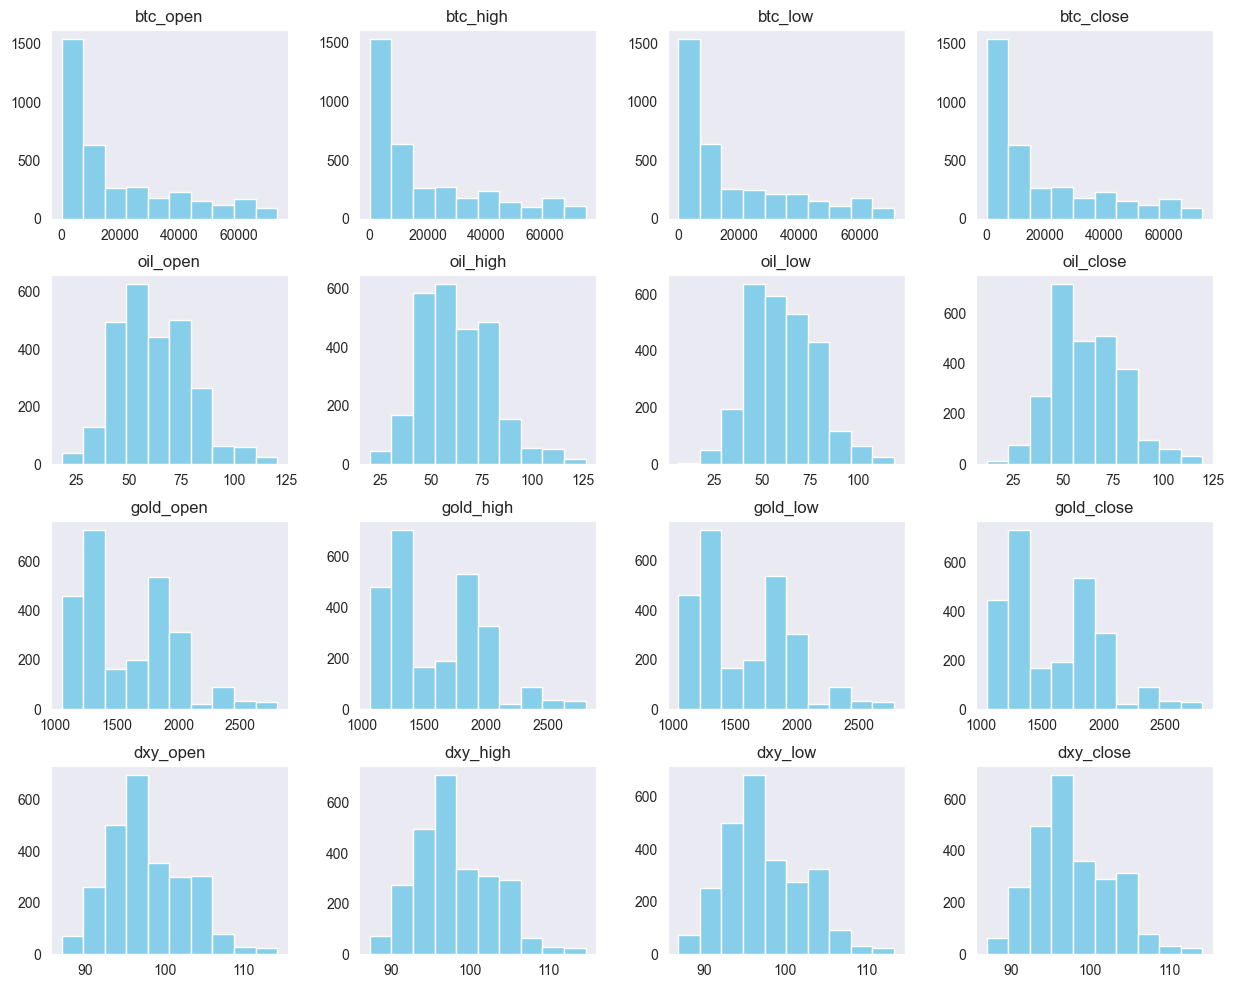

In [278]:
df.drop(columns=['Date', 'Month', 'Year', 'IS_HOLIDAY', 'IS_WEEKDAY']).hist(grid=False, color='skyblue', figsize=(15, 12) )
plt.plot()

#### **Correlation Analysis**

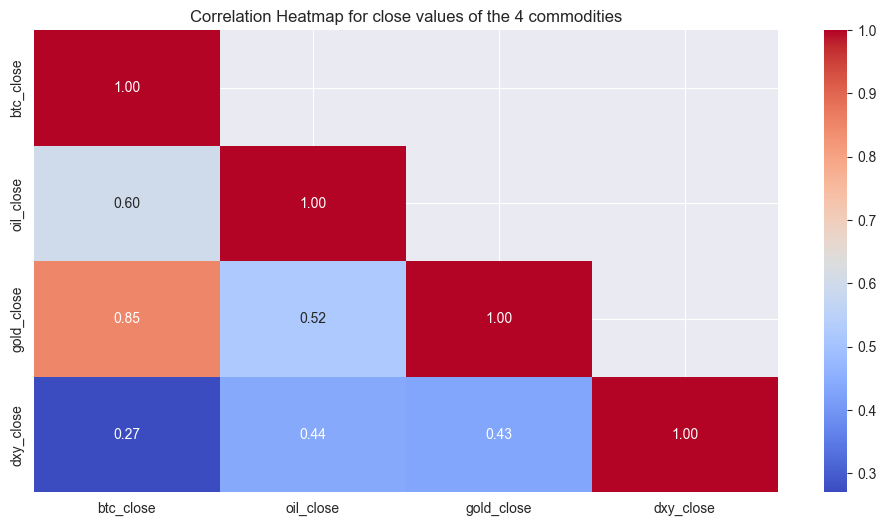

In [279]:
correlation_matrix = df[['btc_close', 'oil_close', 'gold_close', 'dxy_close']].corr().round(2)

# Modify the mask to exclude the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap with the modified mask to include the diagonal
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap for close values of the 4 commodities")
plt.show()

#### **Time Series Analysis**

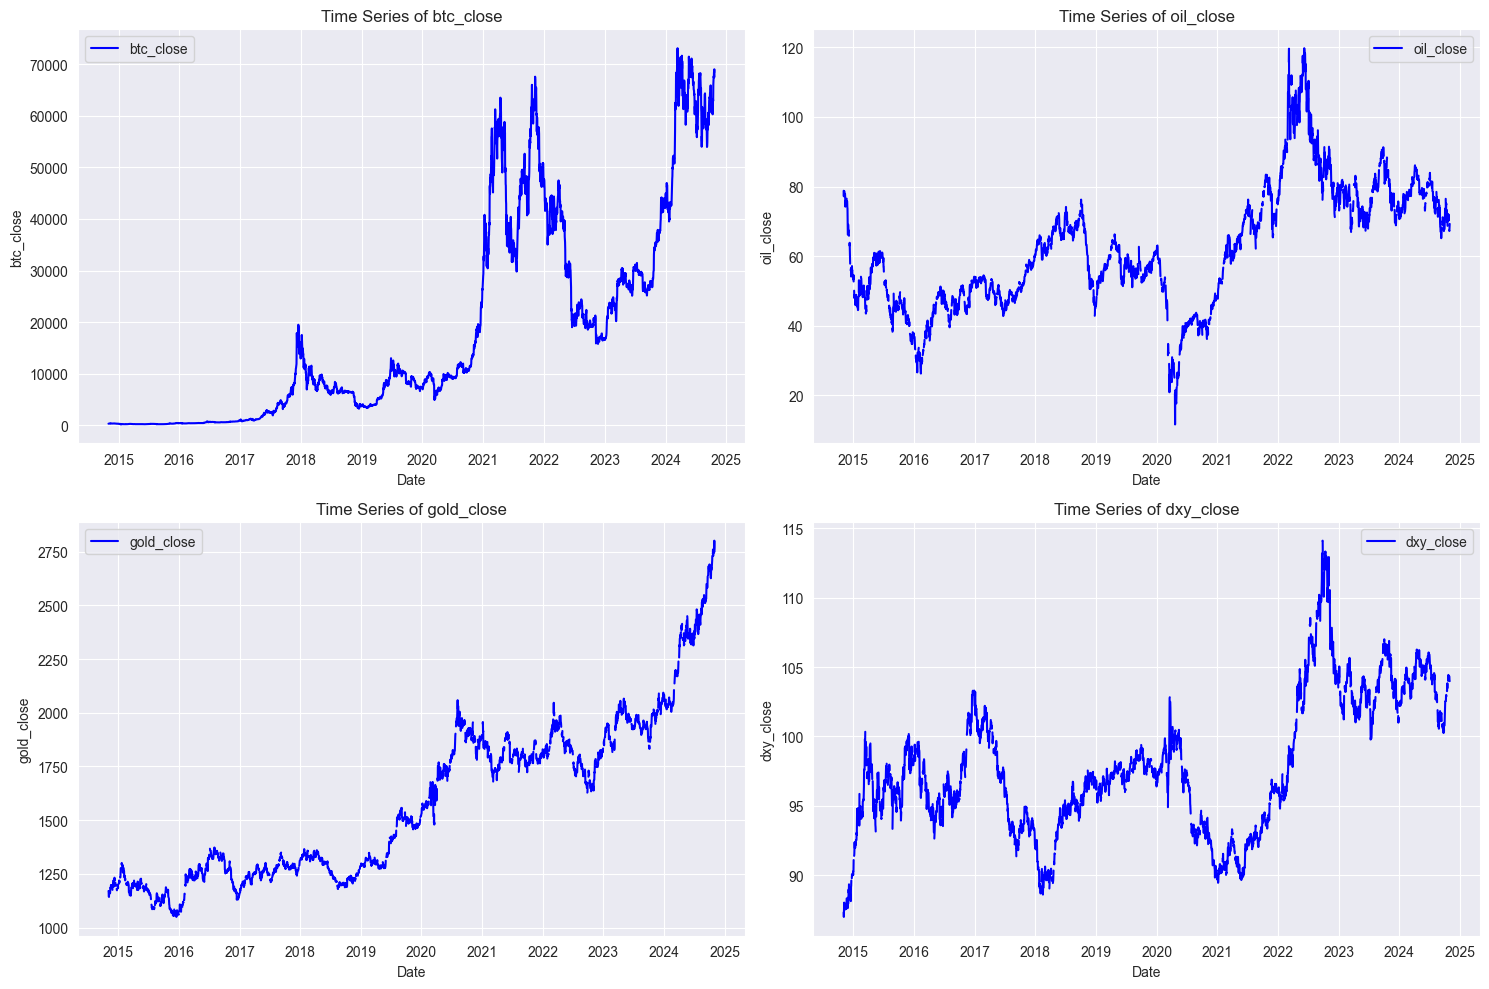

In [280]:
# Set Date as the index for time series analysis
df.set_index('Date', inplace=True)

# Ensure the dataset is sorted by date in ascending order
df = df.sort_index(ascending=True)


# List of variables to analyze
variables = ['btc_close', 'oil_close', 'gold_close', 'dxy_close']

# Plot time series of each variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(df[var], label=var, color='blue')
    plt.title(f"Time Series of {var}")
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

#### **Addictive Decomposition**

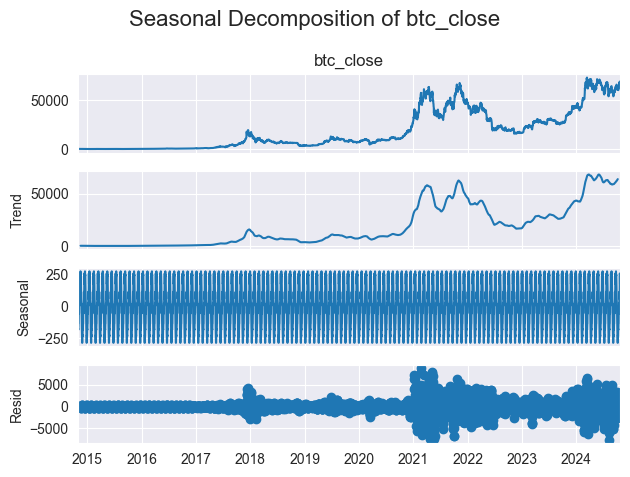

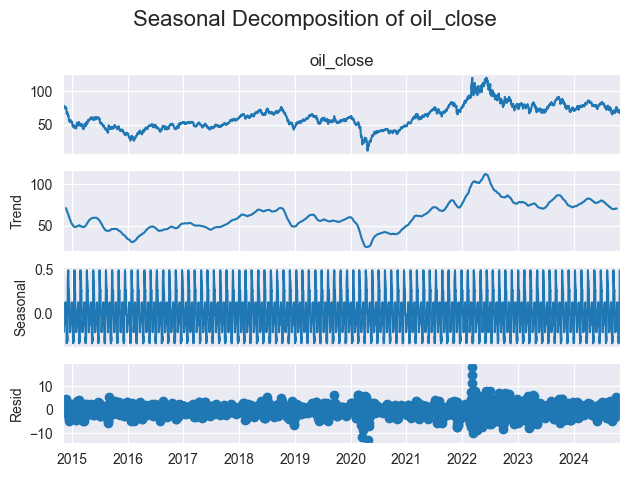

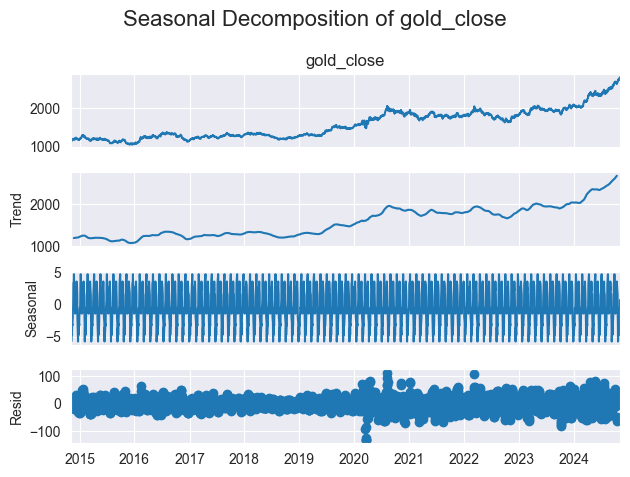

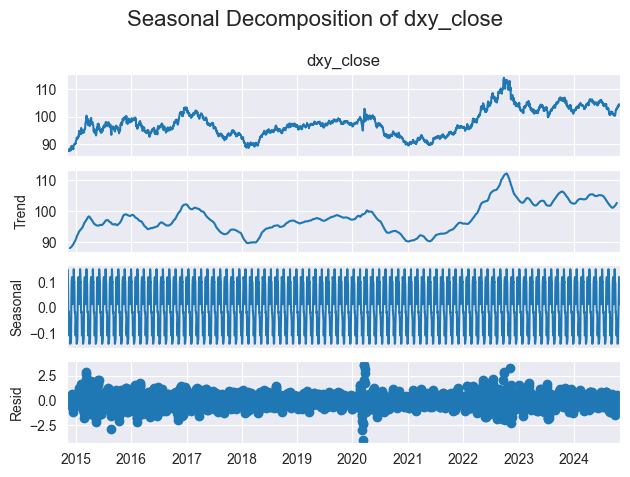

In [281]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='additive', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85) 
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center') 
    plt.show()

#### **Multiplicative Decomposition**

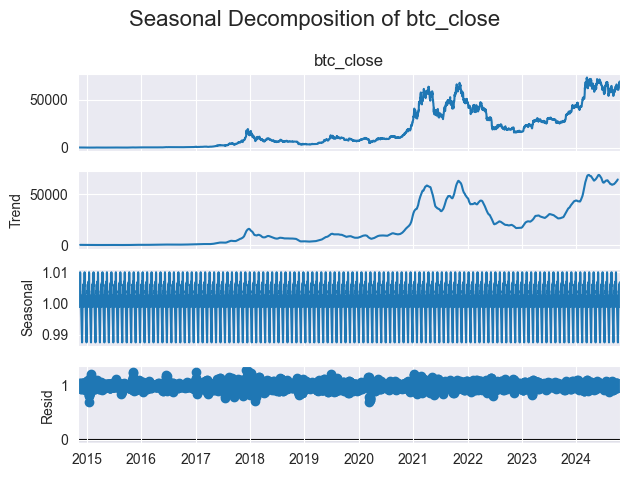

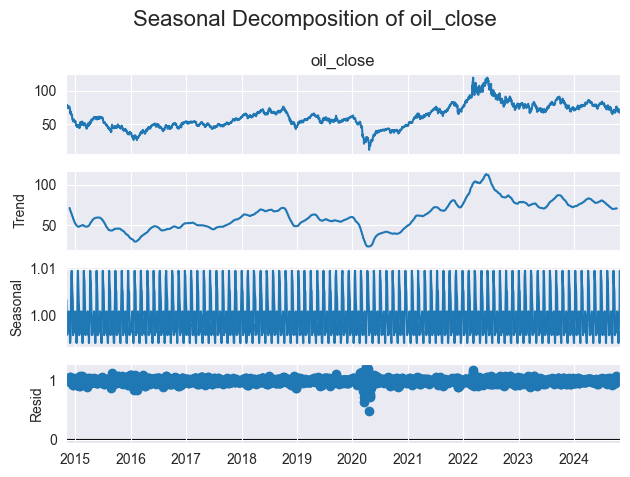

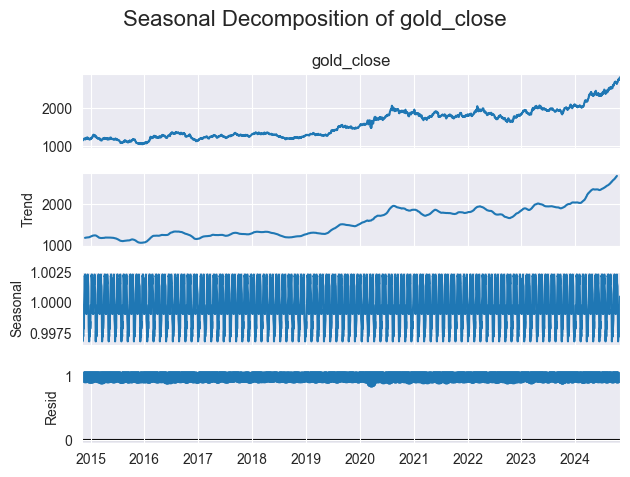

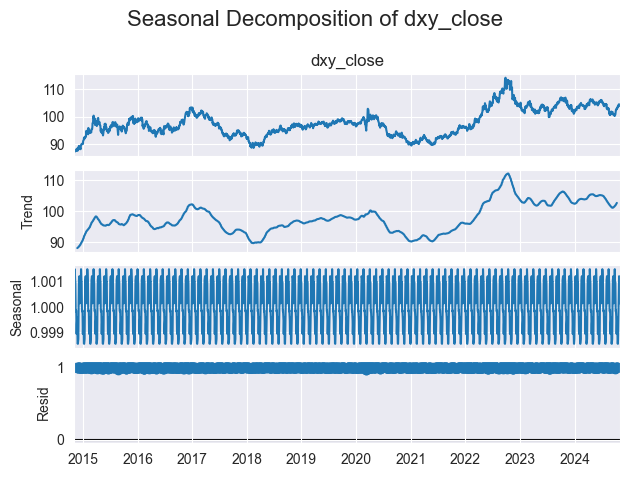

In [282]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='multiplicative', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85)  
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center')  
    plt.show()

### **Outlier Analysis**

Text(0.5, 1.0, 'Outlier Analysis for Oil and Dollar Index')

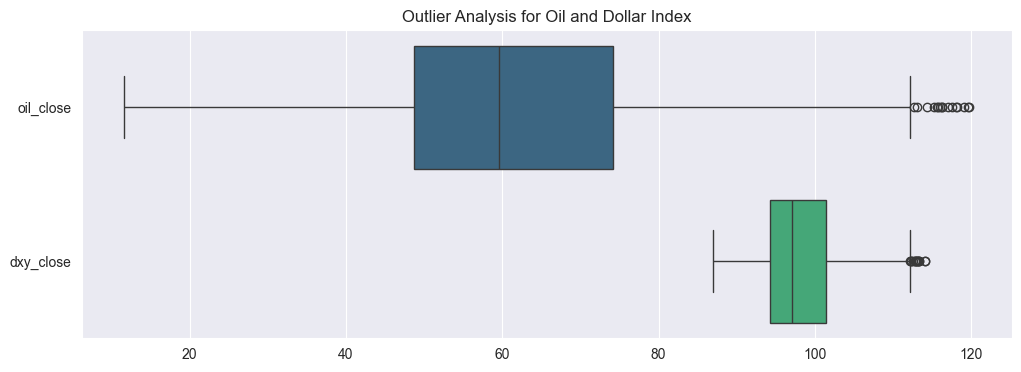

In [283]:
plt.figure(figsize=(12, 4))
sns.boxplot(df[['oil_close', 'dxy_close']], orient='h', palette='viridis')
plt.title('Outlier Analysis for Oil and Dollar Index')

[]

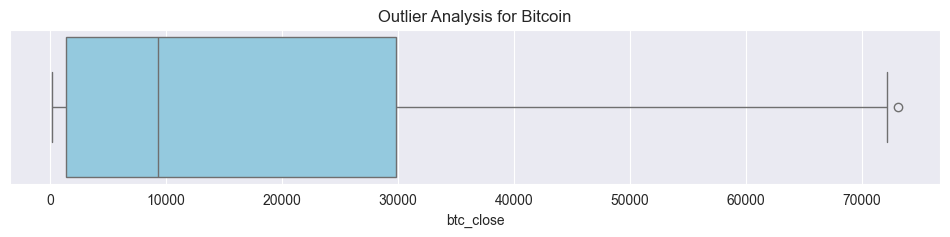

In [284]:
plt.figure(figsize=(12, 2))
sns.boxplot(df['btc_close'], orient='h', color='skyblue' )
plt.title('Outlier Analysis for Bitcoin')
plt.plot()

[]

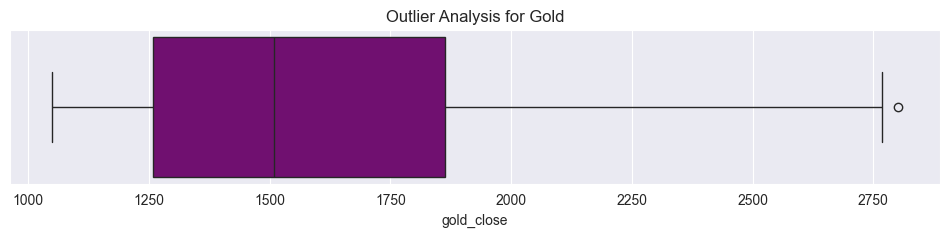

In [285]:
plt.figure(figsize=(12, 2))
sns.boxplot(df['gold_close'], orient='h', color='purple' )
plt.title('Outlier Analysis for Gold')
plt.plot()

### **`Data Preparation`**

Hamed's code here

##### **Imputation missing values using Linear Interpolation and Backward fill**

In [286]:
df.isna().sum()

DoW                0
Month              0
Year               0
btc_open          10
btc_high          10
btc_low           10
btc_close         10
oil_open        1016
oil_high        1016
oil_low         1016
oil_close       1016
gold_open       1089
gold_high       1089
gold_low        1089
gold_close      1089
dxy_open        1043
dxy_high        1043
dxy_low         1043
dxy_close       1043
IS_HOLIDAY         0
IS_WEEKDAY         0
Holiday_Name    3549
dtype: int64

In [287]:
# Imputing missing values in the oil, gold, and dollar data with interpolation
cols = ['btc_open', 'btc_high', 'btc_low', 'btc_close',
        'oil_open', 'oil_high', 'oil_low', 'oil_close',
         'gold_open', 'gold_high', 'gold_low', 'gold_close',
        'dxy_close', 'dxy_open', 'dxy_high', 'dxy_low']

df[cols] = df[cols].interpolate(method='linear', axis=0)

In [288]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,...,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,...,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,...,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,...,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN


In [289]:
df.isna().sum()

DoW                0
Month              0
Year               0
btc_open           0
btc_high           0
btc_low            0
btc_close          0
oil_open           2
oil_high           2
oil_low            2
oil_close          2
gold_open          2
gold_high          2
gold_low           2
gold_close         2
dxy_open           2
dxy_high           2
dxy_low            2
dxy_close          2
IS_HOLIDAY         0
IS_WEEKDAY         0
Holiday_Name    3549
dtype: int64

In [290]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,...,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,...,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,...,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,...,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN


#### **Feature Engineering**
1. **Creating weekly and monthly moving averages**
2. **Creating percentage change for all 4 commoditiies**

In [291]:
def apply_feature_engineering(df):
    """
    Apply feature engineering directly to the given DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing price columns.

    Returns:
    - pd.DataFrame: Transformed DataFrame with new engineered features.
    """
    # Define the columns for each asset
    assets = {
        'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
        'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
        'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
        'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
    }
    
    # Define the price columns for running averages
    price_cols = ['btc_open', 'btc_close', 'oil_open', 'oil_close', 'gold_open', 'gold_close', 'dxy_open', 'dxy_close']

    # Calculate running weekly and monthly averages
    for col in price_cols:
        df[f'{col}_weekly_avg'] = df[col].rolling(window=7, min_periods=1).mean()
        df[f'{col}_monthly_avg'] = df[col].rolling(window=30, min_periods=1).mean()
    
    # Calculate daily percentage changes
    for asset, cols in assets.items():
        open_col, close_col, high_col, low_col = cols
        df[f'{asset}_daily_percentage'] = ((df[close_col] - df[open_col]) / df[open_col]) * 100
        df[f'{asset}_daily_max_percentage'] = ((df[high_col] - df[open_col]) / df[open_col]) * 100
        df[f'{asset}_daily_min_percentage'] = ((df[low_col] - df[open_col]) / df[open_col]) * 100
    
    # Calculate intraday volatility
    for asset in assets.keys():
        df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_open']) * 100
    
    # Calculate rolling volatility of daily percentage changes
    for asset in assets.keys():
        # Daily percentage change
        df[f'{asset}_daily_pct_change'] = df[f'{asset}_close'].pct_change() * 100
        
        # Rolling volatility (standard deviation of daily percentage changes)
        df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_pct_change'].rolling(window=7).std()
        df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_pct_change'].rolling(window=30).std()
    
    return df

In [292]:
apply_feature_engineering(df)

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,...,btc_rolling_volatility_30,oil_daily_pct_change,oil_rolling_volatility_7,oil_rolling_volatility_30,gold_daily_pct_change,gold_rolling_volatility_7,gold_rolling_volatility_30,dxy_daily_pct_change,dxy_rolling_volatility_7,dxy_rolling_volatility_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.980000,78.080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.410000,75.840000,...,NaN,-2.018279,NaN,NaN,-0.179518,NaN,NaN,-0.377964,NaN,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.350000,76.460000,...,NaN,1.930302,NaN,NaN,-1.884046,NaN,NaN,0.528857,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,Sunday,10,2024,69009.37,69408.10,66873.84,67525.97,69.43,69.973333,67.933333,...,1.786862,-2.085901,2.103183,2.049756,0.166256,0.630561,0.576807,0.019179,0.216091,0.199731
2024-10-28,Monday,10,2024,69009.37,69408.10,66873.84,67525.97,68.98,69.000000,66.920000,...,1.786936,-2.130338,2.191355,2.089053,0.165980,0.631339,0.575492,0.019175,0.211509,0.200711
2024-10-29,Tuesday,10,2024,69009.37,69408.10,66873.84,67525.97,68.02,68.520000,66.720000,...,1.784753,-0.252300,1.606657,2.089559,0.468087,0.587239,0.577452,0.000000,0.211734,0.201975


In [293]:
dd

NameError: name 'dd' is not defined

In [ ]:
## Running Averages for open and close data

# List of price columns
price_cols = ['btc_open', 'btc_close', 'oil_open', 'oil_close', 'gold_open', 'gold_close', 'dxy_open', 'dxy_close']

# Calculate running weekly and monthly averages
for col in price_cols:
    df[f'{col}_weekly_avg'] = df[col].rolling(window=7, min_periods=1).mean()
    df[f'{col}_monthly_avg'] = df[col].rolling(window=30, min_periods=1).mean()


# Asset categories and their respective price types
assets = {
    'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
    'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
    'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
    'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
}

# Calculate daily percentage changes
for asset, cols in assets.items():
    open_col, close_col, high_col, low_col = cols
    df[f'{asset}_Daily_percentage'] = ((df[close_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_max_percentage'] = ((df[high_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_min_percentage'] = ((df[low_col] - df[open_col]) / df[open_col] * 100)


# Calculate intraday volatility as the percentage difference between high and low prices
assets = ['btc', 'oil', 'gold', 'dxy']  

for asset in assets:
    df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_open']) * 100


# Calculate rolling volatility of daily percentage changes over 7-day and 30-day windows

for asset in assets:
    # Daily percentage change
    df[f'{asset}_daily_pct_change'] = df[f'{asset}_close'].pct_change() * 100
    
    # Rolling volatility (standard deviation of daily percentage changes)
    df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_pct_change'].rolling(window=7).std()
    df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_pct_change'].rolling(window=30).std()

In [ ]:
## Running Averages for open and close data

# List of price columns
price_cols = ['btc_open', 'btc_close', 'oil_open', 'oil_close', 'gold_open', 'gold_close', 'dxy_open', 'dxy_close']

# Calculate running weekly and monthly averages
for col in price_cols:
    df[f'{col}_weekly_avg'] = df[col].rolling(window=7, min_periods=1).mean()
    df[f'{col}_monthly_avg'] = df[col].rolling(window=30, min_periods=1).mean()

In [ ]:
# Asset categories and their respective price types
assets = {
    'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
    'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
    'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
    'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
}

# Calculate daily percentage changes
for asset, cols in assets.items():
    open_col, close_col, high_col, low_col = cols
    df[f'{asset}_Daily_percentage'] = ((df[close_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_max_percentage'] = ((df[high_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_min_percentage'] = ((df[low_col] - df[open_col]) / df[open_col] * 100)

In [ ]:
# Calculate intraday volatility as the percentage difference between high and low prices
assets = ['btc', 'oil', 'gold', 'dxy']  

for asset in assets:
    df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_open']) * 100

In [ ]:
# Calculate rolling volatility of daily percentage changes over 7-day and 30-day windows

for asset in assets:
    # Daily percentage change
    df[f'{asset}_daily_pct_change'] = df[f'{asset}_close'].pct_change() * 100
    
    # Rolling volatility (standard deviation of daily percentage changes)
    df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_pct_change'].rolling(window=7).std()
    df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_pct_change'].rolling(window=30).std()

In [ ]:
df.isna().sum()

DoW                            0
Month                          0
Year                           0
btc_open                       0
btc_high                       0
                              ..
gold_rolling_volatility_7      9
gold_rolling_volatility_30    32
dxy_daily_pct_change           3
dxy_rolling_volatility_7       9
dxy_rolling_volatility_30     32
Length: 66, dtype: int64

#### **Shift Target for Forecasting**

In [ ]:
df['dxy_future_pct_change'] = df['dxy_daily_pct_change'].shift(-1)

In [ ]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,...,oil_daily_pct_change,oil_rolling_volatility_7,oil_rolling_volatility_30,gold_daily_pct_change,gold_rolling_volatility_7,gold_rolling_volatility_30,dxy_daily_pct_change,dxy_rolling_volatility_7,dxy_rolling_volatility_30,dxy_future_pct_change
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.377964
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,...,-2.018279,NaN,NaN,-0.179518,NaN,NaN,-0.377964,NaN,NaN,0.528857
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,...,1.930302,NaN,NaN,-1.884046,NaN,NaN,0.528857,NaN,NaN,0.651876


In [ ]:
df.isna().sum()

DoW                            0
Month                          0
Year                           0
btc_open                       0
btc_high                       0
                              ..
gold_rolling_volatility_30    32
dxy_daily_pct_change           3
dxy_rolling_volatility_7       9
dxy_rolling_volatility_30     32
dxy_future_pct_change          3
Length: 67, dtype: int64

In [ ]:
df["dxy_daily_pct_change"].fillna(value=0, inplace=True)

In [ ]:
df.isna().sum()

DoW                            0
Month                          0
Year                           0
btc_open                       0
btc_high                       0
                              ..
gold_rolling_volatility_30    32
dxy_daily_pct_change           0
dxy_rolling_volatility_7       9
dxy_rolling_volatility_30     32
dxy_future_pct_change          3
Length: 67, dtype: int64

In [ ]:
# Divide data into X and Y variables
X = df.drop(columns=['dxy_daily_pct_change'])
y = df['dxy_daily_pct_change']

In [ ]:
numeric_columns = X.select_dtypes('number').columns
categorical_columns = X.select_dtypes('object').columns

numeric_columns

Index(['Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'IS_HOLIDAY', 'IS_WEEKDAY',
       'btc_open_weekly_avg', 'btc_open_monthly_avg', 'btc_close_weekly_avg',
       'btc_close_monthly_avg', 'oil_open_weekly_avg', 'oil_open_monthly_avg',
       'oil_close_weekly_avg', 'oil_close_monthly_avg', 'gold_open_weekly_avg',
       'gold_open_monthly_avg', 'gold_close_weekly_avg',
       'gold_close_monthly_avg', 'dxy_open_weekly_avg', 'dxy_open_monthly_avg',
       'dxy_close_weekly_avg', 'dxy_close_monthly_avg', 'btc_Daily_percentage',
       'btc_Daily_max_percentage', 'btc_Daily_min_percentage',
       'oil_Daily_percentage', 'oil_Daily_max_percentage',
       'oil_Daily_min_percentage', 'gold_Daily_percentage',
       'gold_Daily_max_percentage', 'gold_Daily_min_percentage',
       'dxy_Daily_percentage',

In [ ]:
categorical_columns

Index(['DoW', 'Holiday_Name'], dtype='object')

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

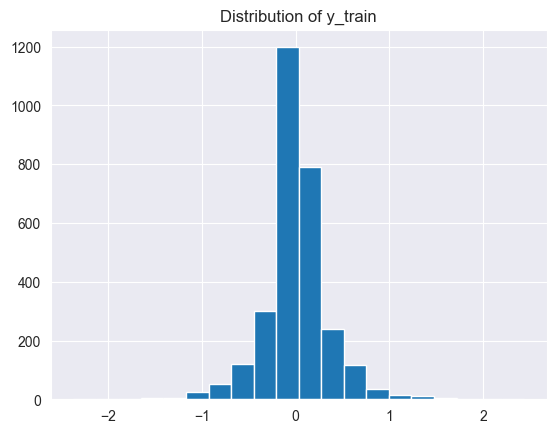

In [ ]:
y_train.hist(bins=20)
plt.title('Distribution of y_train')
plt.show()

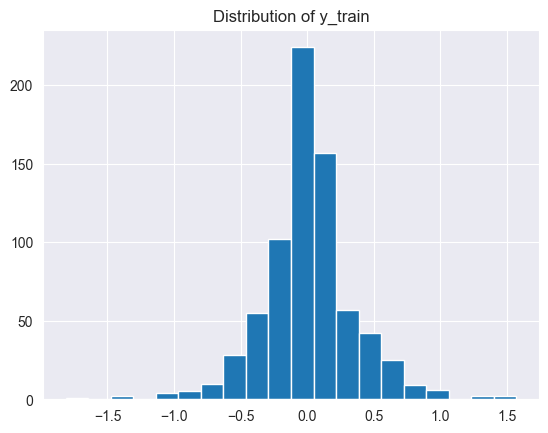

In [ ]:
y_test.hist(bins=20)
plt.title('Distribution of y_train')
plt.show()

In [ ]:
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numeric_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'IS_HOLIDAY', 'IS_W...
       'oil_rolling_volatility_30', 'gold_daily_pct_change',
       'gold_rolling_volatility_7', 'gold_rolling_volatility_30',
       'dxy_rolling_volatility_7', 'dxy_rolling_volatility_30',
       'dxy_future_pct_change'],
      dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['DoW', 'Holiday_Name'], dtype='object'))])

### **`Modelling & Evaluation`**

In [ ]:
df['Movement'] = df['dxy_daily_pct_change'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

In [ ]:
important_features = ['Year','IS_HOLIDAY', 'Month',           
'IS_WEEKDAY', 'btc_Daily_percentage', 'btc_Daily_max_percentage', 'btc_Daily_min_percentage', 'oil_Daily_max_percentage',  
'oil_Daily_min_percentage',  'gold_Daily_percentage', 'gold_Daily_max_percentage', 'gold_Daily_min_percentage', 'dxy_Daily_max_percentage',  
'btc_intraday_volatility',   'oil_intraday_volatility', 'gold_intraday_volatility', 'Movement', 
'btc_daily_pct_change', 'btc_rolling_volatility_7',  'btc_rolling_volatility_30' , 'oil_daily_pct_change', 'oil_rolling_volatility_7',  
'oil_rolling_volatility_30', 'gold_daily_pct_change', 'gold_rolling_volatility_7', 'gold_rolling_volatility_30',
]

In [ ]:
df = df[important_features]
df

,Year,IS_HOLIDAY,Month,IS_WEEKDAY,btc_Daily_percentage,btc_Daily_max_percentage,btc_Daily_min_percentage,oil_Daily_max_percentage,oil_Daily_min_percentage,gold_Daily_percentage,...,Movement,btc_daily_pct_change,btc_rolling_volatility_7,btc_rolling_volatility_30,oil_daily_pct_change,oil_rolling_volatility_7,oil_rolling_volatility_30,gold_daily_pct_change,gold_rolling_volatility_7,gold_rolling_volatility_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,2014,0.0,11,0,-3.809243,0.555145,-5.197106,NaN,NaN,NaN,...,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-02,2014,0.0,11,0,-0.058268,0.910819,-1.671369,NaN,NaN,NaN,...,Negative,0.042978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,2014,0.0,11,1,0.608164,2.589305,-0.027644,0.483931,-3.114530,-0.111007,...,Negative,0.509374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,2014,0.0,11,1,1.017851,1.409096,-0.635775,0.242905,-3.042700,0.266186,...,Negative,0.897573,NaN,NaN,-2.018279,NaN,NaN,-0.179518,NaN,NaN
2014-11-05,2014,0.0,11,1,2.664207,3.837547,0.000000,2.572389,-1.163392,-1.942828,...,Positive,2.723229,NaN,NaN,1.930302,NaN,NaN,-1.884046,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,2024,0.0,10,0,-2.149563,0.577791,-3.094551,0.782563,-2.155648,0.245330,...,Positive,0.000000,0.808347,1.786862,-2.085901,2.103183,2.049756,0.166256,0.630561,0.576807
2024-10-28,2024,0.0,10,1,-2.149563,0.577791,-3.094551,0.028994,-2.986373,0.243707,...,Positive,0.000000,0.000000,1.786936,-2.130338,2.191355,2.089053,0.165980,0.631339,0.575492
2024-10-29,2024,0.0,10,1,-2.149563,0.577791,-3.094551,0.735078,-1.911203,0.981072,...,Negative,0.000000,0.000000,1.784753,-0.252300,1.606657,2.089559,0.468087,0.587239,0.577452


In [ ]:
# Divide data into X and Y variables
X = df.drop(columns=['Movement'])
y = df['Movement']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
input_features = X.columns
input_features

Index(['Year', 'IS_HOLIDAY', 'Month', 'IS_WEEKDAY', 'btc_Daily_percentage',
       'btc_Daily_max_percentage', 'btc_Daily_min_percentage',
       'oil_Daily_max_percentage', 'oil_Daily_min_percentage',
       'gold_Daily_percentage', 'gold_Daily_max_percentage',
       'gold_Daily_min_percentage', 'dxy_Daily_max_percentage',
       'btc_intraday_volatility', 'oil_intraday_volatility',
       'gold_intraday_volatility', 'btc_daily_pct_change',
       'btc_rolling_volatility_7', 'btc_rolling_volatility_30',
       'oil_daily_pct_change', 'oil_rolling_volatility_7',
       'oil_rolling_volatility_30', 'gold_daily_pct_change',
       'gold_rolling_volatility_7', 'gold_rolling_volatility_30'],
      dtype='object')

In [ ]:
X_train.columns

Index(['Year', 'IS_HOLIDAY', 'Month', 'IS_WEEKDAY', 'btc_Daily_percentage',
       'btc_Daily_max_percentage', 'btc_Daily_min_percentage',
       'oil_Daily_max_percentage', 'oil_Daily_min_percentage',
       'gold_Daily_percentage', 'gold_Daily_max_percentage',
       'gold_Daily_min_percentage', 'dxy_Daily_max_percentage',
       'btc_intraday_volatility', 'oil_intraday_volatility',
       'gold_intraday_volatility', 'btc_daily_pct_change',
       'btc_rolling_volatility_7', 'btc_rolling_volatility_30',
       'oil_daily_pct_change', 'oil_rolling_volatility_7',
       'oil_rolling_volatility_30', 'gold_daily_pct_change',
       'gold_rolling_volatility_7', 'gold_rolling_volatility_30'],
      dtype='object')

In [ ]:
input_features.dtype

dtype('O')

In [ ]:
input_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])


preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', input_pipeline, input_features),
    ])

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
]

In [ ]:
selection = SelectKBest(mutual_info_classif, k='all')

fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipelines = {}

for model_name, classifier in models:

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)

    all_pipelines[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)

    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    acccuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_df.loc[len(fi_smote_df)] = [model_name, acccuracy, precision, recall, f1_score]


fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.685363,0.685690,0.685363,0.685341
1,SVC,0.740082,0.740557,0.740082,0.740048
2,Random Forest,0.742818,0.744077,0.742818,0.742645
3,Logistic Regression,0.749658,0.752551,0.749658,0.749172


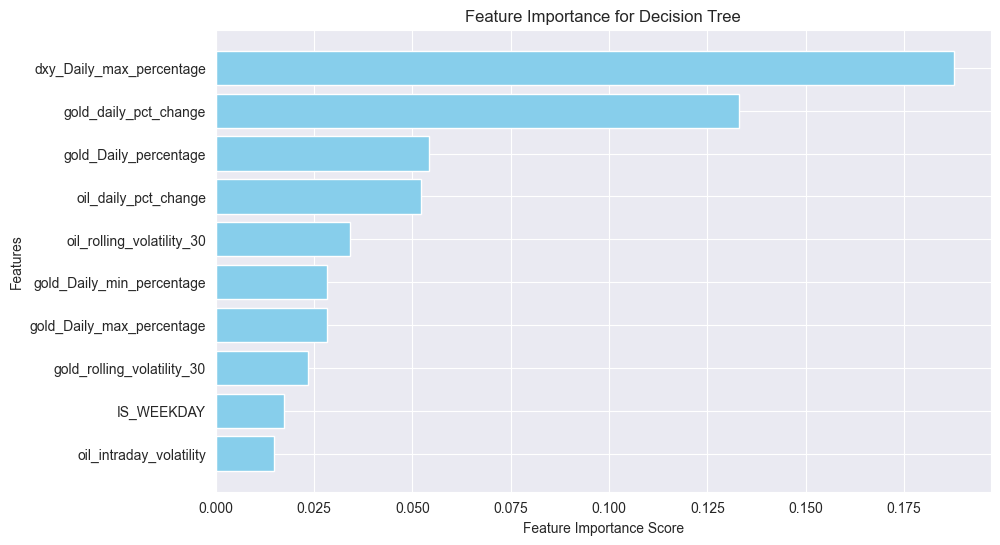

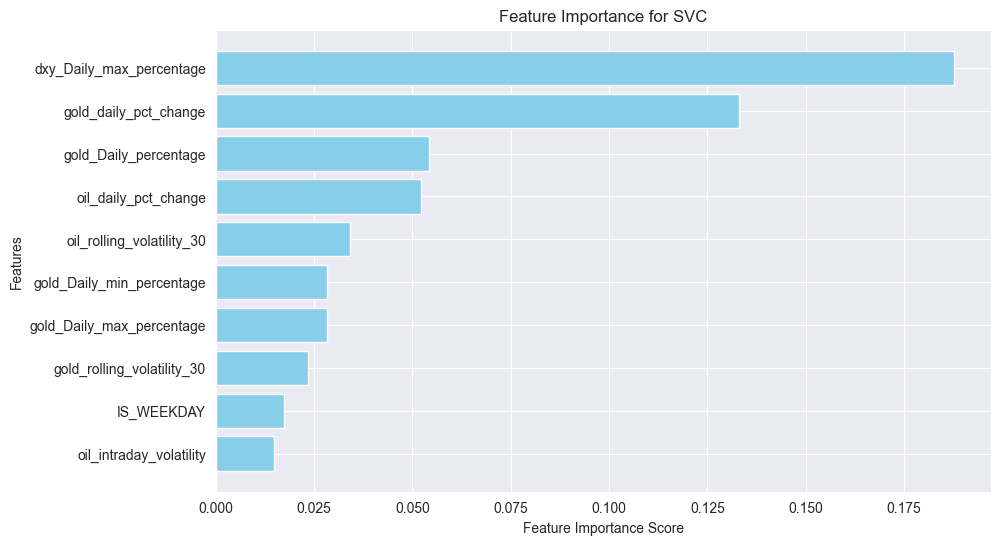

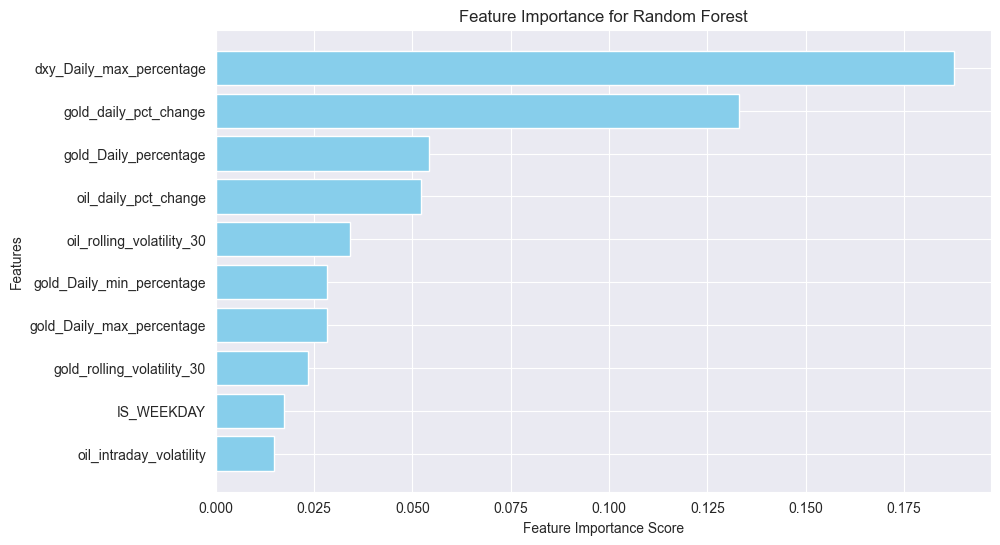

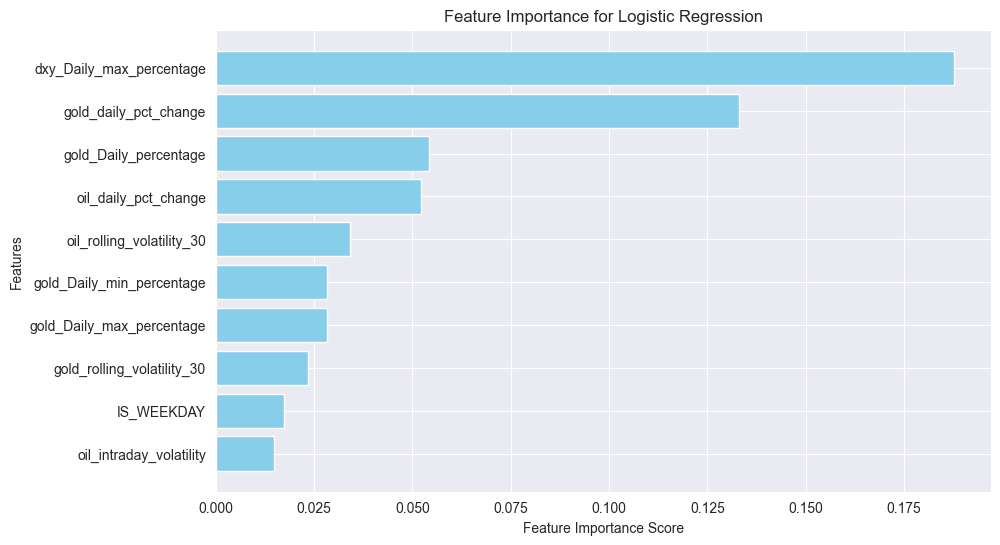

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Loop through each pipeline stored in the all_pipelines dictionary
for model_name, pipeline in all_pipelines.items():
    # Get the SelectKBest instance from the pipeline
    selection = pipeline.named_steps['feature_importance']
    
    # Extract feature scores and names
    feature_scores = selection.scores_
    feature_names = X_train.columns  # Ensure X_train is a DataFrame with column names

    # Combine names and scores, then sort by score
    feature_importance = sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)
    features, scores = zip(*feature_importance)
    
    # Plot the feature importance for this model
    plt.figure(figsize=(10, 6))
    plt.barh(features[:10], scores[:10], color='skyblue')  # Plot top 10 features
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {model_name}')
    plt.gca().invert_yaxis()  # Invert y-axis for descending order
    plt.show()


In [ ]:
all_pipelines['Logistic Regression']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Year', 'IS_HOLIDAY', 'Month', 'IS_WEEKDAY', 'btc_Daily_percentage',
       'btc_Daily_max_percentage', 'btc_Daily_min_percentage',
       'oil_Daily_max_percentage', 'oil_Daily_min_perc...
       'btc_rolling_volatility_7', 'btc_rolling_volatility_30',
       'oil_daily_pct_change', 'oil_rolling_volatility_7',
       'oil_rolling_volatility_30', 'gold_daily_pct_change',
       'gold_rolling_volatility_7', 'gold_rolling_volatility_30'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000020CB865E200>)),
                ('classifier', LogisticRegression(random_state=42))])

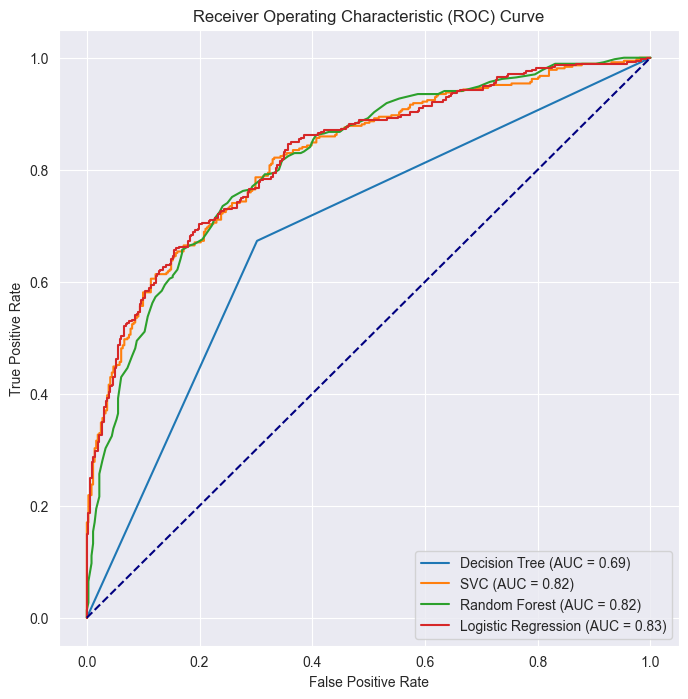

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}

for model_name, pipeline in all_pipelines.items():

    y_score = pipeline.predict_proba(X_test)[:, 1]

    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positve Rate': fpr, 'True Positve Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.show()

##### **FUnction to engineering column before passing output to the model**

In [ ]:
## Running Averages for open and close data

# List of price columns
price_cols = ['btc_open', 'btc_close', 'oil_open', 'oil_close', 'gold_open', 'gold_close', 'dxy_open', 'dxy_close']

# Calculate running weekly and monthly averages
for col in price_cols:
    df[f'{col}_weekly_avg'] = df[col].rolling(window=7, min_periods=1).mean()
    df[f'{col}_monthly_avg'] = df[col].rolling(window=30, min_periods=1).mean()


# Asset categories and their respective price types
assets = {
    'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
    'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
    'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
    'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
}

# Calculate daily percentage changes
for asset, cols in assets.items():
    open_col, close_col, high_col, low_col = cols
    df[f'{asset}_Daily_percentage'] = ((df[close_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_max_percentage'] = ((df[high_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_min_percentage'] = ((df[low_col] - df[open_col]) / df[open_col] * 100)


# Calculate intraday volatility as the percentage difference between high and low prices
assets = ['btc', 'oil', 'gold', 'dxy']  

for asset in assets:
    df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_open']) * 100


# Calculate rolling volatility of daily percentage changes over 7-day and 30-day windows

for asset in assets:
    # Daily percentage change
    df[f'{asset}_daily_pct_change'] = df[f'{asset}_close'].pct_change() * 100
    
    # Rolling volatility (standard deviation of daily percentage changes)
    df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_pct_change'].rolling(window=7).std()
    df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_pct_change'].rolling(window=30).std()

In [ ]:
def apply_feature_engineering(df):
    """
    Apply feature engineering directly to the given DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing price columns.

    Returns:
    - pd.DataFrame: Transformed DataFrame with new engineered features.
    """
    # Define the columns for each asset
    assets = {
        'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
        'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
        'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
        'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
    }
    
    # Define the price columns for running averages
    price_cols = ['btc_open', 'btc_close', 'oil_open', 'oil_close', 'gold_open', 'gold_close', 'dxy_open', 'dxy_close']

    # Calculate running weekly and monthly averages
    for col in price_cols:
        df[f'{col}_weekly_avg'] = df[col].rolling(window=7, min_periods=1).mean()
        df[f'{col}_monthly_avg'] = df[col].rolling(window=30, min_periods=1).mean()
    
    # Calculate daily percentage changes
    for asset, cols in assets.items():
        open_col, close_col, high_col, low_col = cols
        df[f'{asset}_daily_percentage'] = ((df[close_col] - df[open_col]) / df[open_col]) * 100
        df[f'{asset}_daily_max_percentage'] = ((df[high_col] - df[open_col]) / df[open_col]) * 100
        df[f'{asset}_daily_min_percentage'] = ((df[low_col] - df[open_col]) / df[open_col]) * 100
    
    # Calculate intraday volatility
    for asset in assets.keys():
        df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_open']) * 100
    
    # Calculate rolling volatility of daily percentage changes
    for asset in assets.keys():
        # Daily percentage change
        df[f'{asset}_daily_pct_change'] = df[f'{asset}_close'].pct_change() * 100
        
        # Rolling volatility (standard deviation of daily percentage changes)
        df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_pct_change'].rolling(window=7).std()
        df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_pct_change'].rolling(window=30).std()
    
    return df


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for running averages
class RunningAverages(BaseEstimator, TransformerMixin):
    def __init__(self, columns, window_sizes):
        self.columns = columns
        self.window_sizes = window_sizes  # e.g., {'weekly': 7, 'monthly': 30}
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.columns:
            for name, window in self.window_sizes.items():
                X_transformed[f'{col}_{name}_avg'] = X_transformed[col].rolling(window=window, min_periods=1).mean()
        return X_transformed

# Custom transformer for daily percentage changes
class DailyPercentageChange(BaseEstimator, TransformerMixin):
    def __init__(self, assets):
        self.assets = assets

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for asset, cols in self.assets.items():
            open_col, close_col, high_col, low_col = cols
            X_transformed[f'{asset}_Daily_percentage'] = ((X_transformed[close_col] - X_transformed[open_col]) / X_transformed[open_col]) * 100
            X_transformed[f'{asset}_Daily_max_percentage'] = ((X_transformed[high_col] - X_transformed[open_col]) / X_transformed[open_col]) * 100
            X_transformed[f'{asset}_Daily_min_percentage'] = ((X_transformed[low_col] - X_transformed[open_col]) / X_transformed[open_col]) * 100
        return X_transformed

# Custom transformer for intraday volatility
class IntradayVolatility(BaseEstimator, TransformerMixin):
    def __init__(self, assets):
        self.assets = assets

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for asset in self.assets:
            X_transformed[f'{asset}_intraday_volatility'] = ((X_transformed[f'{asset}_high'] - X_transformed[f'{asset}_low']) / X_transformed[f'{asset}_open']) * 100
        return X_transformed

# Custom transformer for rolling volatility
class RollingVolatility(BaseEstimator, TransformerMixin):
    def __init__(self, assets, windows):
        self.assets = assets
        self.windows = windows  # e.g., [7, 30]
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for asset in self.assets:
            for window in self.windows:
                X_transformed[f'{asset}_rolling_volatility_{window}'] = X_transformed[f'{asset}_close'].pct_change().rolling(window=window).std()
        return X_transformed


In [ ]:
# Define transformers
running_averages = RunningAverages(columns=price_cols, window_sizes={'weekly': 7, 'monthly': 30})
daily_pct_change = DailyPercentageChange(assets=assets)
intraday_volatility = IntradayVolatility(assets=['btc', 'oil', 'gold', 'dxy'])
rolling_volatility = RollingVolatility(assets=['btc', 'oil', 'gold', 'dxy'], windows=[7, 30])

# Update pipeline with feature engineering steps
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('running_averages', running_averages),
        ('daily_pct_change', daily_pct_change),
        ('intraday_volatility', intraday_volatility),
        ('rolling_volatility', rolling_volatility),
        ('preprocessor', preprocessor), 
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)
    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    acccuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_df.loc[len(fi_smote_df)] = [model_name, acccuracy, precision, recall, f1_score]

fi_smote_df


KeyError: 'btc_open'

In [ ]:
print(X_train.columns)


Index(['Year', 'IS_HOLIDAY', 'Month', 'IS_WEEKDAY', 'btc_Daily_percentage',
       'btc_Daily_max_percentage', 'btc_Daily_min_percentage',
       'oil_Daily_max_percentage', 'oil_Daily_min_percentage',
       'gold_Daily_percentage', 'gold_Daily_max_percentage',
       'gold_Daily_min_percentage', 'dxy_Daily_max_percentage',
       'btc_intraday_volatility', 'oil_intraday_volatility',
       'gold_intraday_volatility', 'btc_daily_pct_change',
       'btc_rolling_volatility_7', 'btc_rolling_volatility_30',
       'oil_daily_pct_change', 'oil_rolling_volatility_7',
       'oil_rolling_volatility_30', 'gold_daily_pct_change',
       'gold_rolling_volatility_7', 'gold_rolling_volatility_30'],
      dtype='object')


In [ ]:
for model_name, pipeline in all_pipelines.items():

    # Extract feature importances for tree-based models
    if hasattr(pipeline.named_steps['model_name'], 'feature_importances_'):
        # Get feature importances
        importances = pipeline.named_steps['model_name'].feature_importances_
        
        # Retrieve feature names from preprocessor
        if isinstance(preprocessor, ColumnTransformer):
            feature_names = preprocessor.get_feature_names_out()
        
        # Combine into a DataFrame
        feature_importances = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Plot feature importances
        plt.figure(figsize=(10, 8))
        plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Feature Importances ({model_name})')
        plt.gca().invert_yaxis()
        plt.show()

KeyError: 'model_name'